In [1]:
#....................   import Library   ...........................

import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [2]:
path=('C://Users/Ghani/Downloads/Nairobi Transport Data/train_revised.csv')
df = pd.read_csv(path)

In [3]:
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [4]:
df.shape

(51645, 10)

In [5]:
df.isna().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [7]:
df.describe(include=object)

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


## Summary:-

    There are total 61 unique seats in this dataset

    travelers have used 2 types of payment method and most of the people have used Mpesa to pay for their ticket.

    There are 2 different types of car and most of them are bus.


In [8]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

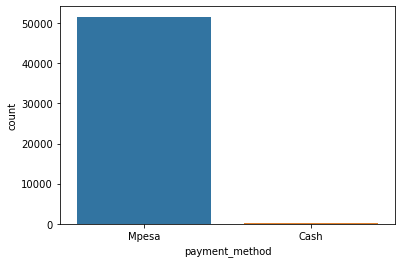

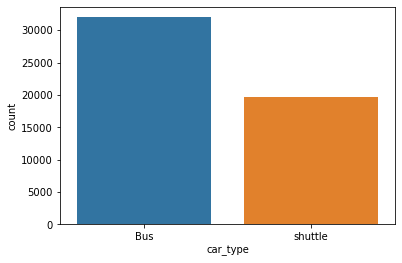

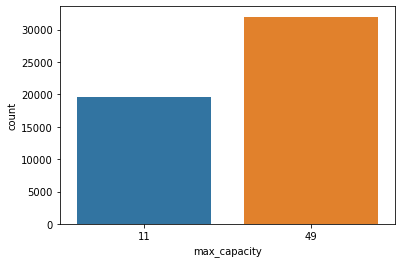

In [9]:
count_plot=['payment_method','car_type','max_capacity']
for i in count_plot:
    sns.countplot(x=df[i])
    plt.show()
    

## Summary

    There are two type of payment methods people have used to buy the tickets.

    There are two type of cars Bus and shuttle and the maximum capacity of the bus is 49 while shuttle can contain 11 travelers

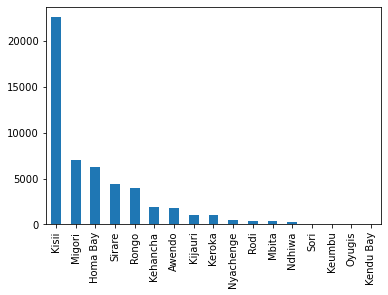

In [10]:
travel_from=df['travel_from'].value_counts()
travel_from.plot(kind='bar')

plt.show()

<AxesSubplot:>

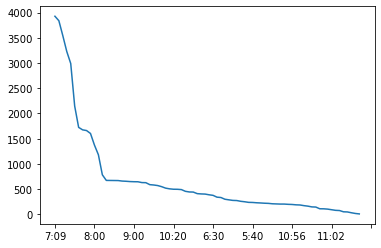

In [11]:
df['travel_time'].value_counts().plot()

In [12]:
df['ride_id'].value_counts()

8454     50
13211    49
10834    49
8090     49
11382    49
         ..
10090     1
10091     1
10114     1
10116     1
14304     1
Name: ride_id, Length: 6249, dtype: int64


## Finding Our Target Variable

Since we are not given the target variable so we need to find target variable first.

 I will find the count of each ride_id and that will be the number_of_ticket as our target variable.


In [13]:
no_ticket=df.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()
no_ticket.head()

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31


In [14]:
df=df.drop_duplicates("ride_id")

In [15]:

df = df.merge(no_ticket,how="left",on="ride_id")
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31


In [16]:
df = df.drop(['seat_number','payment_method','payment_receipt','travel_to'], axis=1)

In [17]:
df.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket
0,1442,17-10-17,7:15,Migori,Bus,49,1
1,5437,19-11-17,7:12,Migori,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5
4,5778,27-11-17,7:12,Migori,Bus,49,31


<AxesSubplot:xlabel='travel_from', ylabel='number_of_ticket'>

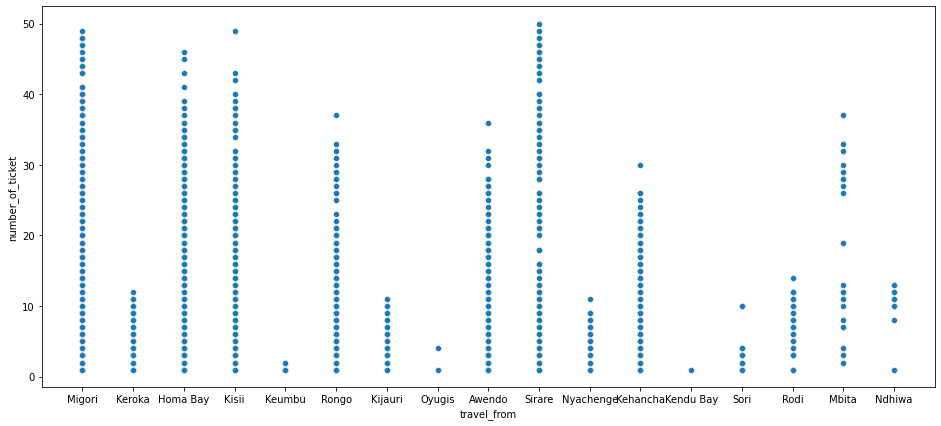

In [18]:
plt.figure(figsize=(16, 7))

sns.scatterplot(x="travel_from", y="number_of_ticket", data=df)

In [19]:
df["date"]=df["travel_date"]+ " "+df["travel_time"]

In [20]:
df.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date
0,1442,17-10-17,7:15,Migori,Bus,49,1,17-10-17 7:15
1,5437,19-11-17,7:12,Migori,Bus,49,1,19-11-17 7:12
2,5710,26-11-17,7:05,Keroka,Bus,49,1,26-11-17 7:05
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,27-11-17 7:10
4,5778,27-11-17,7:12,Migori,Bus,49,31,27-11-17 7:12


In [21]:
def  time_features(df):
    
    
        
      '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
        
        
      df["date"]=pd.to_datetime(df["date"])
      df["day_of_week"]=df["date"].dt.dayofweek
      df["day_of_year"]=df["date"].dt.dayofyear
      df["day_of_month"]=df["date"].dt.day
      df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
      df["hour"]=df["date"].dt.hour
      df["minute"]=df["date"].dt.minute
      df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
      df["year"]=df["date"].dt.year
      df["quarter"]=df["date"].dt.quarter
      df["month"]=df["date"].dt.month
      return df

In [22]:
data= time_features(df)

C:\Users\Ghani\AppData\Local\Temp\ipykernel_7784\2334567898.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)


In [23]:
data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11


<AxesSubplot:xlabel='day_of_month', ylabel='number_of_ticket'>

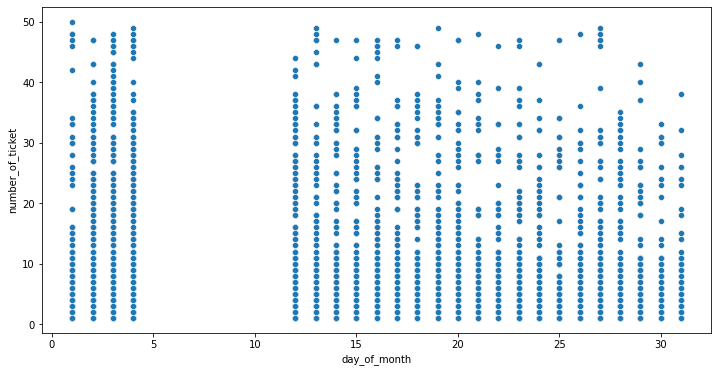

In [24]:


plt.figure(figsize=(12, 6))

sns.scatterplot(x='day_of_month', y="number_of_ticket", data=data)




Summary

    We can see that there is the gap between 5 to 11 in the day of the month. We can assume that there is official holyday of public transport between these days. we can also say that the number of tickets in all the days of month are same.



<AxesSubplot:xlabel='hour', ylabel='number_of_ticket'>

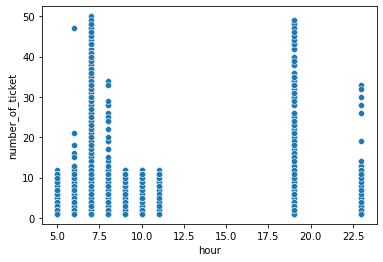

In [25]:
sns.scatterplot(x='hour', y="number_of_ticket", data=data)

In [26]:
copy_data=data.copy()

In [27]:
copy_data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,17,201742,7,15,0,2017,4,10
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,19,201746,7,12,1,2017,4,11
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,26,201747,7,5,1,2017,4,11
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,27,201748,7,10,0,2017,4,11
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,27,201748,7,12,0,2017,4,11


In [28]:
copy_data.shape

(6249, 18)

In [29]:
copy_data.month.value_counts()

12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: month, dtype: int64

In [30]:
dict_cov = {12:1,2:1,1:1,2:1,4:2,11:2,9:3,7:3,8:3,10:3,6:3,5:3}
copy_data['month'].replace(dict_cov,inplace=True) 

In [31]:
copy_data['month'].value_counts()

1    2931
3    2304
2    1014
Name: month, dtype: int64

In [32]:
copy_data.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date', 'day_of_week',
       'day_of_year', 'day_of_month', 'year_woy', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'month'],
      dtype='object')

In [33]:
copy_data.day_of_month.unique()

array([17, 19, 26, 27, 20, 18, 16, 15, 14, 13,  4, 28, 31, 30, 29, 25, 24,
       23, 22, 21, 12,  3,  2,  1], dtype=int64)

In [34]:
copy_data['day_of_month'].value_counts()

2     706
12    685
3     659
4     446
1     267
13    249
14    247
16    238
28    228
19    226
18    226
15    213
17    209
20    202
22    192
21    183
27    179
29    177
23    159
24    137
26    120
30    113
25     96
31     92
Name: day_of_month, dtype: int64

In [35]:
conv_dict = {2:1, 12:1, 3:1, 4:1,  1:2,17:2, 19:2, 20:2, 18:2, 16:2, 15:2, 14:2, 13:2, 28:2
             , 22:3, 21:3, 27:3, 29:3, 23:3, 24:3, 26:3, 30:3, 25:3, 31:3}
copy_data['day_of_month'].replace(conv_dict,inplace=True)

In [36]:
copy_data.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month
0,1442,17-10-17,7:15,Migori,Bus,49,1,2017-10-17 07:15:00,1,290,2,201742,7,15,0,2017,4,3
1,5437,19-11-17,7:12,Migori,Bus,49,1,2017-11-19 07:12:00,6,323,2,201746,7,12,1,2017,4,2
2,5710,26-11-17,7:05,Keroka,Bus,49,1,2017-11-26 07:05:00,6,330,3,201747,7,5,1,2017,4,2
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5,2017-11-27 07:10:00,0,331,3,201748,7,10,0,2017,4,2
4,5778,27-11-17,7:12,Migori,Bus,49,31,2017-11-27 07:12:00,0,331,3,201748,7,12,0,2017,4,2


In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
model=LinearRegression()
le=LabelEncoder()

In [38]:
copy_data['car_type']=le.fit_transform(copy_data['car_type'])

In [39]:
copy_data['car_type'].unique()

array([0, 1])

In [40]:
copy_data=pd.get_dummies(copy_data, columns=['travel_from','day_of_month','month'])

In [41]:
copy_data.head(3)

,ride_id,travel_date,travel_time,car_type,max_capacity,number_of_ticket,date,day_of_week,day_of_year,year_woy,...,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,day_of_month_1,day_of_month_2,day_of_month_3,month_1,month_2,month_3
0,1442,17-10-17,7:15,0,49,1,2017-10-17 07:15:00,1,290,201742,...,0,0,0,0,0,1,0,0,0,1
1,5437,19-11-17,7:12,0,49,1,2017-11-19 07:12:00,6,323,201746,...,0,0,0,0,0,1,0,0,1,0
2,5710,26-11-17,7:05,0,49,1,2017-11-26 07:05:00,6,330,201747,...,0,0,0,0,0,0,1,0,1,0


In [42]:
Target_name=copy_data["number_of_ticket"]
keys= copy_data["ride_id"]
not_used_cols=["ride_id","travel_time" ,"travel_date","date",'year_woy','max_capacity','number_of_ticket']

In [43]:
fetures=copy_data.drop(not_used_cols,axis='columns',errors='ignore')

In [44]:
fetures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6249 entries, 0 to 6248
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   car_type               6249 non-null   int32
 1   day_of_week            6249 non-null   int64
 2   day_of_year            6249 non-null   int64
 3   hour                   6249 non-null   int64
 4   minute                 6249 non-null   int64
 5   is_weekend             6249 non-null   int64
 6   year                   6249 non-null   int64
 7   quarter                6249 non-null   int64
 8   travel_from_Awendo     6249 non-null   uint8
 9   travel_from_Homa Bay   6249 non-null   uint8
 10  travel_from_Kehancha   6249 non-null   uint8
 11  travel_from_Kendu Bay  6249 non-null   uint8
 12  travel_from_Keroka     6249 non-null   uint8
 13  travel_from_Keumbu     6249 non-null   uint8
 14  travel_from_Kijauri    6249 non-null   uint8
 15  travel_from_Kisii      6249 non-null  


## Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [46]:
X=fetures
y=Target_name

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [48]:
y_pred = model.predict(X_test)

In [49]:
 #Find R-squared value
r2 =r2_score(y_test, y_pred)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test,y_test)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [50]:
print("R2 Score is ="  ,r2)
print("Training Score is ="  ,train_score)
print("Training Score is ="  ,test_score)


R2 Score is = 0.40844821608770066
Training Score is = 0.3686496346418562
Training Score is = 0.40844821608770066


In [51]:
import math
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2 is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [52]:

print_metrics(y_test, y_test_pred)

MSE is 45.27491151365616
RMSE is 6.72866342698579
R2 is 0.40844821608770066
MAE is 4.617187535220779
MAPE is 155.5850039574457


## Implementing Lasso Regression

In [53]:

from sklearn.linear_model import Lasso


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
alphas = [0.01,0.025,0.5,0.8,0.75,1]
for alpha in alphas:
  lasso  = Lasso(alpha=alpha , max_iter= 3000)
  lasso.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',lasso.score(X_test, y_test))
  print('train Score: ',lasso.score(X_train, y_train))

alpha:  0.01
test Score:  0.40551557487966605
train Score:  0.366645063238098
alpha:  0.025
test Score:  0.39739082601967257
train Score:  0.36031069795566784
alpha:  0.5
test Score:  0.11537026797679828
train Score:  0.09544617287740176
alpha:  0.8
test Score:  0.06398181623288657
train Score:  0.044586343519411153
alpha:  0.75
test Score:  0.0643736292632009
train Score:  0.04471337959391253
alpha:  1
test Score:  0.06232943918750444
train Score:  0.043996253260866536


We see that at alpha = 0.01 it give best out of those

In [55]:

y_test_pred = lasso.predict(X_test)
print('MSE is {}'.format(mean_squared_error(y_test, y_test_pred)))
print('RMSE is {}'.format(math.sqrt(mean_squared_error(y_test, y_test_pred))))
print('MAE is {}'.format(mean_absolute_error(y_test, y_test_pred)))



MSE is 71.76540215799594
RMSE is 8.471446284902946
MAE is 5.9840719906724775


## Training XGboost

In [56]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

xgb = xgb.XGBRegressor()

In [57]:


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

xgb.fit(X_train, y_train)
 


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [59]:
xgb.score(X_train,y_train)

0.8838631894596994

In [60]:
xgb.score(X_test,y_test)


0.6041593691041987

## Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:

rf=RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

rf.fit(X_train,y_train)


RandomForestRegressor()

In [63]:
rf.score(X_train,y_train)

0.9435977578460399

In [64]:
rf.score(X_test,y_test)



0.5831083984538001


## Conclusion

### We used diffent type of regression algorithms to train our model like, Linear Regression, Regularized linear regression (Lasso), GBM,Random Forest Regressor, XGboost regresssor. and Also we tuned the parameters of Random forest regressor and XGboost regressor and also found the important features for training the model. Out of them XGboost with tuned hyperparameters gave the best result.
